# Mise en place

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import re
import spacy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

In [3]:
#data = pd.read_csv('/content/drive/MyDrive/Parcours_OCR_AI_Engineer/Projets/P004_/En_Cours/application_train.csv')
#bureau = pd.read_csv('/content/drive/MyDrive/Parcours_OCR_AI_Engineer/Projets/P004_/En_Cours/bureau.csv')
#data_test = pd.read_csv('/content/drive/MyDrive/Parcours_OCR_AI_Engineer/Projets/P004_/En_Cours/application_test.csv')

data = pd.read_csv('/content/drive/MyDrive/Parcours_OCR_AI_Engineer/Projets/P004_/En_Cours/application_train.csv')
bureau = pd.read_csv('/content/drive/MyDrive/Parcours_OCR_AI_Engineer/Projets/P004_/En_Cours/bureau.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Parcours_OCR_AI_Engineer/Projets/P004_/En_Cours/application_test.csv')

In [4]:
#Afficher toute les colonnes
pd.set_option('display.max_columns', None)

In [5]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Observation et Nettoyage

In [6]:
import math

# Calculer la moyenne des valeurs de 'CNT_CHILDREN' pour les individus avec une valeur inférieure ou égale à 7
moyenne_children_inf_ou_egal_10 = math.ceil(data.loc[data['CNT_CHILDREN'] <= 10, 'CNT_CHILDREN'].mean())

# Remplacer les valeurs de 'CNT_CHILDREN' supérieures à 10 par la moyenne calculée
data.loc[data['CNT_CHILDREN'] > 10, 'CNT_CHILDREN'] = moyenne_children_inf_ou_egal_10

# Calculer la moyenne des valeurs de 'CNT_CHILDREN' pour les individus avec une valeur inférieure ou égale à 7
moyenne_children_inf_ou_egal_10 = math.ceil(data_test.loc[data_test['CNT_CHILDREN'] <= 10, 'CNT_CHILDREN'].mean())

# Remplacer les valeurs de 'CNT_CHILDREN' supérieures à 10 par la moyenne calculée
data_test.loc[data_test['CNT_CHILDREN'] > 10, 'CNT_CHILDREN'] = moyenne_children_inf_ou_egal_10


In [7]:
index_days_birth = data.columns.get_loc('DAYS_BIRTH') + 1

# Insérer la nouvelle colonne 'Age' à la position voulue
data.insert(loc=index_days_birth, column='Age', value=(data['DAYS_BIRTH'] / -365).astype(int))

index_days_birth = data_test.columns.get_loc('DAYS_BIRTH') + 1

# Insérer la nouvelle colonne 'Age' à la position voulue
data_test.insert(loc=index_days_birth, column='Age', value=(data_test['DAYS_BIRTH'] / -365).astype(int))

In [8]:
index_days_employed = data.columns.get_loc('DAYS_EMPLOYED') + 1

# Insérer la nouvelle colonne 'Age' à la position voulue
data.insert(loc=index_days_employed, column='Nbr_AnnéeTravail', value=(data['DAYS_EMPLOYED'] / -365).round(2))

index_days_employed = data_test.columns.get_loc('DAYS_EMPLOYED') + 1

# Insérer la nouvelle colonne 'Age' à la position voulue
data_test.insert(loc=index_days_employed, column='Nbr_AnnéeTravail', value=(data_test['DAYS_EMPLOYED'] / -365).round(2))

In [9]:
# Remplacer les NaN dans 'AMT_ANNUITY' par 0 (ou une autre valeur logique selon votre contexte)
data['AMT_ANNUITY'].fillna(0, inplace=True)

epsilon = 0.01  # Une petite valeur pour éviter la division par zéro
data['TempsPret'] = (((data['AMT_ANNUITY'] + epsilon) / data['AMT_CREDIT'])).replace([np.inf, -np.inf], np.nan).fillna(0).round(2)

# Si vous voulez insérer cette colonne à une position spécifique
index_amt_annuity = data.columns.get_loc('AMT_ANNUITY') + 1
data.insert(loc=index_amt_annuity, column='TempsPret', value=data.pop('TempsPret'))

#Application sur DF Test
# Remplacer les NaN dans 'AMT_ANNUITY' par 0 (ou une autre valeur logique selon votre contexte)
data_test['AMT_ANNUITY'].fillna(0, inplace=True)

epsilon = 0.01  # Une petite valeur pour éviter la division par zéro
data_test['TempsPret'] = (((data['AMT_ANNUITY'] + epsilon) / data['AMT_CREDIT'])).replace([np.inf, -np.inf], np.nan).fillna(0).round(2)

# Si vous voulez insérer cette colonne à une position spécifique
index_amt_annuity = data_test.columns.get_loc('AMT_ANNUITY') + 1
data_test.insert(loc=index_amt_annuity, column='TempsPret', value=data_test.pop('TempsPret'))

In [10]:
# Calcul du taux d'endettement
data['Taux_Endettement'] = ((data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL'])).round(2)

# Trouver l'indice de la colonne 'TempsPret' et définir la position de la nouvelle colonne 'Taux d'endettement'
index_temps_pret = data.columns.get_loc('TempsPret') + 1

# Insérer la colonne 'Taux d'endettement' à la position souhaitée
data.insert(loc=index_temps_pret, column='Taux_Endettement', value=data.pop('Taux_Endettement'))

# Afficher le DataFrame pour vérifier le résultat
data

#Application sur DF Test
# Calcul du taux d'endettement
data_test['Taux_Endettement'] = ((data_test['AMT_ANNUITY'] / data_test['AMT_INCOME_TOTAL'])).round(2)

# Trouver l'indice de la colonne 'TempsPret' et définir la position de la nouvelle colonne 'Taux d'endettement'
index_temps_pret = data_test.columns.get_loc('TempsPret') + 1

# Insérer la colonne 'Taux d'endettement' à la position souhaitée
data_test.insert(loc=index_temps_pret, column='Taux_Endettement', value=data_test.pop('Taux_Endettement'))

In [11]:
data['RatioVieTravail'] = data['Nbr_AnnéeTravail'] / data['Age']

data_test['RatioVieTravail'] = data_test['DAYS_EMPLOYED'] / data_test['DAYS_BIRTH']

In [12]:
data['RatioCreditRevenu'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']

data_test['RatioCreditRevenu'] = data_test['AMT_CREDIT'] / data_test['AMT_INCOME_TOTAL']

In [13]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [14]:
missing_values = missing_values_table(data)
missing_values.head(67)

Your selected dataframe has 128 columns.
There are 66 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
...,...,...
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
CNT_FAM_MEMBERS,2,0.0


In [15]:
correlations = data.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
RatioVieTravail                0.042180
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
Nbr_AnnéeTravail               0.044932
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
Age                          -0.078234
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226


# Score Métier

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Calcul du score de groupe basé sur la moyenne de 'AMT_INCOME_TOTAL' pour chaque combinaison
group_means = data.groupby(['NAME_INCOME_TYPE', 'OCCUPATION_TYPE','ORGANIZATION_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index()
group_means.rename(columns={'AMT_INCOME_TOTAL': 'GROUP_INCOME_MEAN'}, inplace=True)

# Fusionner avec le DataFrame d'origine pour attribuer à chaque individu la moyenne de son groupe
data = data.merge(group_means, on=['NAME_INCOME_TYPE', 'OCCUPATION_TYPE','ORGANIZATION_TYPE'])

# Normalisation des moyennes de groupe sur une échelle de 0 à 100 pour le score de groupe
scaler = MinMaxScaler(feature_range=(0, 100))
data['GROUP_SCORE'] = scaler.fit_transform(data[['GROUP_INCOME_MEAN']])

# Normalisation des revenus individuels 'AMT_INCOME_TOTAL' dans chaque groupe
data['INDIVIDUAL_SCORE'] = data.groupby(['NAME_INCOME_TYPE', 'OCCUPATION_TYPE','ORGANIZATION_TYPE'])['AMT_INCOME_TOTAL'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# Fusionner les deux scores pour obtenir le ScoreMétier
# Ici, on choisit simplement de faire la moyenne des deux scores, mais vous pouvez choisir un autre mode de fusion si nécessaire
data['ScoreMetier'] = data[['GROUP_SCORE', 'INDIVIDUAL_SCORE']].mean(axis=1).round(2)

# Afficher les résultats
print(data[['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'AMT_INCOME_TOTAL', 'ScoreMetier']].head())


#Application sur DF de Test
# Calcul du score de groupe basé sur la moyenne de 'AMT_INCOME_TOTAL' pour chaque combinaison
group_means = data_test.groupby(['NAME_INCOME_TYPE', 'OCCUPATION_TYPE','ORGANIZATION_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index()
group_means.rename(columns={'AMT_INCOME_TOTAL': 'GROUP_INCOME_MEAN'}, inplace=True)

# Fusionner avec le DataFrame d'origine pour attribuer à chaque individu la moyenne de son groupe
data_test = data_test.merge(group_means, on=['NAME_INCOME_TYPE', 'OCCUPATION_TYPE','ORGANIZATION_TYPE'])

# Normalisation des moyennes de groupe sur une échelle de 0 à 100 pour le score de groupe
scaler = MinMaxScaler(feature_range=(0, 100))
data_test['GROUP_SCORE'] = scaler.fit_transform(data_test[['GROUP_INCOME_MEAN']])

# Normalisation des revenus individuels 'AMT_INCOME_TOTAL' dans chaque groupe
data_test['INDIVIDUAL_SCORE'] = data_test.groupby(['NAME_INCOME_TYPE', 'OCCUPATION_TYPE','ORGANIZATION_TYPE'])['AMT_INCOME_TOTAL'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

# Fusionner les deux scores pour obtenir le ScoreMétier
# Ici, on choisit simplement de faire la moyenne des deux scores, mais vous pouvez choisir un autre mode de fusion si nécessaire
data_test['ScoreMetier'] = data_test[['GROUP_SCORE', 'INDIVIDUAL_SCORE']].mean(axis=1).round(2)


  NAME_INCOME_TYPE OCCUPATION_TYPE       ORGANIZATION_TYPE  AMT_INCOME_TOTAL  \
0          Working        Laborers  Business Entity Type 3          202500.0   
1          Working        Laborers  Business Entity Type 3          135000.0   
2          Working        Laborers  Business Entity Type 3           90000.0   
3          Working        Laborers  Business Entity Type 3          103500.0   
4          Working        Laborers  Business Entity Type 3          225000.0   

   ScoreMetier  
0         3.01  
1         2.98  
2         2.96  
3         2.97  
4         3.02  


In [17]:
import plotly.express as px

# Assurez-vous que 'data' est votre DataFrame et qu'il contient les colonnes nécessaires

# Création d'un scatter plot avec Plotly Express
fig = px.scatter(data, x='AMT_INCOME_TOTAL', y='ScoreMetier',
                 color='NAME_INCOME_TYPE',
                 symbol='OCCUPATION_TYPE',
                 title='Score Métier en fonction du Revenu Total par Type de Revenu',
                 labels={'AMT_INCOME_TOTAL': 'Revenu Total', 'ScoreMetier': 'Score Métier'},
                 hover_data=['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],  # Ajout de 'ORGANIZATION_TYPE' aux données de survol
                 log_x=True,  # Activation de l'échelle logarithmique pour l'axe des x
                 range_x=[1, data['AMT_INCOME_TOTAL'].max()],  # Ajustement de la plage de l'axe des x si nécessaire
                 size_max=15,  # Ajustement de la taille maximale des marqueurs
                 opacity=0.8)  # Ajustement de l'opacité des marqueurs

# Mise à jour de l'aspect du graphique si nécessaire
fig.update_layout(
    legend=dict(
        title='Légende',
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    yaxis=dict(
        tickmode='linear',  # Mode linéaire pour les ticks
        tick0=0,  # Le premier tick à 0
        dtick=10  # Un tick tous les 10
    ),
    height=800  # Hauteur du graphique à 800 pixels, ajustez selon vos besoins
)



# Afficher le graphique
fig.show()


Output hidden; open in https://colab.research.google.com to view.

### Code Du ScoreMétier

In [18]:
# Mappage des valeurs 'NAME_INCOME_TYPE' et 'OCCUPATION_TYPE' en nombres
income_type_mapping = {v: (i+1)*100 for i, v in enumerate(sorted(set(data['NAME_INCOME_TYPE'])))}
occupation_type_mapping = {v: i+1 for i, v in enumerate(sorted(set(data['OCCUPATION_TYPE'])))}
organization_type_mapping = {v: (i+1)*1000 for i, v in enumerate(sorted(set(data['ORGANIZATION_TYPE'])))}

# Application des mappages aux colonnes
data['NAME_INCOME_TYPE_CODE'] = data['NAME_INCOME_TYPE'].map(income_type_mapping)
data['OCCUPATION_TYPE_CODE'] = data['OCCUPATION_TYPE'].map(occupation_type_mapping)
data['ORGANIZATION_TYPE_CODE'] = data['ORGANIZATION_TYPE'].map(organization_type_mapping)


# Création de la colonne 'CODE_METIER' en sommant les codes des deux colonnes
data['CODE_METIER'] = data['NAME_INCOME_TYPE_CODE'] + data['OCCUPATION_TYPE_CODE'] + data['ORGANIZATION_TYPE_CODE']

# Affichage de quelques lignes pour vérifier le résultat
data[['NAME_INCOME_TYPE', 'NAME_INCOME_TYPE_CODE', 'OCCUPATION_TYPE', 'OCCUPATION_TYPE_CODE', 'ORGANIZATION_TYPE','ORGANIZATION_TYPE_CODE', 'CODE_METIER']]

# Mappage des valeurs 'NAME_INCOME_TYPE' et 'OCCUPATION_TYPE' en nombres
income_type_mapping = {v: (i+1)*100 for i, v in enumerate(sorted(set(data_test['NAME_INCOME_TYPE'])))}
occupation_type_mapping = {v: i+1 for i, v in enumerate(sorted(set(data_test['OCCUPATION_TYPE'])))}
organization_type_mapping = {v: (i+1)*1000 for i, v in enumerate(sorted(set(data_test['ORGANIZATION_TYPE'])))}

# Application des mappages aux colonnes
data_test['NAME_INCOME_TYPE_CODE'] = data_test['NAME_INCOME_TYPE'].map(income_type_mapping)
data_test['OCCUPATION_TYPE_CODE'] = data_test['OCCUPATION_TYPE'].map(occupation_type_mapping)
data_test['ORGANIZATION_TYPE_CODE'] = data_test['ORGANIZATION_TYPE'].map(organization_type_mapping)


# Création de la colonne 'CODE_METIER' en sommant les codes des deux colonnes
data_test['CODE_METIER'] = data_test['NAME_INCOME_TYPE_CODE'] + data_test['OCCUPATION_TYPE_CODE'] + data_test['ORGANIZATION_TYPE_CODE']

### Calcul des revenu haut

In [19]:
import pandas as pd
import numpy as np

# Calcul du seuil pour les 20% inférieurs
threshold_low_income = data['AMT_INCOME_TOTAL'].quantile(0.2)

# Marquage des revenus comme faibles pour les 20% inférieurs
data['LOW_INCOME'] = (data['AMT_INCOME_TOTAL'] <= threshold_low_income).astype(int)

# Calcul des moyennes de revenu pour chaque combinaison de 'NAME_INCOME_TYPE' et 'OCCUPATION_TYPE'
group_means = data.groupby(['NAME_INCOME_TYPE', 'OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].transform('mean')

# Marquage des individus ayant un revenu supérieur à la moyenne de leur groupe parmi les 20% à faible revenu
data['ABOVE_GROUP_MEAN'] = np.where(
    (data['LOW_INCOME'] == 1) & (data['AMT_INCOME_TOTAL'] > group_means), 1, 0)

# Les individus parmi les 20% à faible revenu qui sont en-dessus de la moyenne de leur groupe sont considérés comme ayant un revenu élevé
data['INCOME_LEVEL'] = np.where(data['LOW_INCOME'] == 1, data['ABOVE_GROUP_MEAN'], 1 - data['LOW_INCOME'])

# Visualisons les premières lignes pour confirmer
data[['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'INCOME_LEVEL']].head()

,NAME_INCOME_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,INCOME_LEVEL
0,Working,Laborers,202500.0,1
1,Working,Laborers,135000.0,1
2,Working,Laborers,90000.0,0
3,Working,Laborers,103500.0,0
4,Working,Laborers,225000.0,1


# Analyse de groupes de corrélation

## Préparation

In [20]:
import pandas as pd
import numpy as np

# Calcul du seuil pour les 20% inférieurs
threshold_low_income = data['AMT_INCOME_TOTAL'].quantile(0.2)

# Marquage des revenus comme faibles pour les 20% inférieurs
data['LOW_INCOME'] = (data['AMT_INCOME_TOTAL'] <= threshold_low_income).astype(int)

# Calcul des moyennes de revenu pour chaque combinaison de 'NAME_INCOME_TYPE' et 'OCCUPATION_TYPE'
group_means = data.groupby(['NAME_INCOME_TYPE', 'OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].transform('mean')

# Marquage des individus ayant un revenu supérieur à la moyenne de leur groupe parmi les 20% à faible revenu
data['ABOVE_GROUP_MEAN'] = np.where(
    (data['LOW_INCOME'] == 1) & (data['AMT_INCOME_TOTAL'] > group_means), 1, 0)

# Les individus parmi les 20% à faible revenu qui sont en-dessus de la moyenne de leur groupe sont considérés comme ayant un revenu élevé
data['INCOME_LEVEL'] = np.where(data['LOW_INCOME'] == 1, data['ABOVE_GROUP_MEAN'], 1 - data['LOW_INCOME'])

# Visualisons les premières lignes pour confirmer
data[['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'INCOME_LEVEL']].head()

,NAME_INCOME_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,INCOME_LEVEL
0,Working,Laborers,202500.0,1
1,Working,Laborers,135000.0,1
2,Working,Laborers,90000.0,0
3,Working,Laborers,103500.0,0
4,Working,Laborers,225000.0,1


In [21]:
# NAME_CONTRACT_TYPE
# Créer un dictionnaire de remplacement
mapping1 = {'Revolving loans': 1, 'Cash loans': 0}

# Convertir les valeurs de la colonne 'NAME_CONTRACT_TYPE' en numérique
data['NAME_CONTRACT_TYPE'] = data['NAME_CONTRACT_TYPE'].replace(mapping1)
data_test['NAME_CONTRACT_TYPE'] = data_test['NAME_CONTRACT_TYPE'].replace(mapping1)

In [22]:
# FLAG_OWN_CAR
# FLAG_OWN_REALTY
mapping2 = {'N': 1, 'Y': 0}

# Convertir les valeurs de la colonne 'NAME_CONTRACT_TYPE' en numérique
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace(mapping2)
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace(mapping2)
data_test['FLAG_OWN_CAR'] = data_test['FLAG_OWN_CAR'].replace(mapping2)
data_test['FLAG_OWN_REALTY'] = data_test['FLAG_OWN_REALTY'].replace(mapping2)

In [23]:
# Mapping pour transformer les valeurs en 0 et 1 en fonction de la condition
mapping3 = {True: 1, False: 0}

# Nom de la colonne à transformer
colonne_a_transformer = 'OWN_CAR_AGE'

# Appliquer la transformation en utilisant la méthode "apply" avec une fonction lambda
data['OWN_CAR_AGE'] = data['OWN_CAR_AGE'].apply(lambda x:  x < 10).replace(mapping3)
data_test['OWN_CAR_AGE'] = data_test['OWN_CAR_AGE'].apply(lambda x:  x < 10).replace(mapping3)

In [24]:
#Créer un dictionnaire de remplacement
mapping4 = {'Married': 0, 'Civil marriage': 1, 'Widow': 2, 'Separated':3 ,'Single / not married': 4, 'Unknown': 5}

# Convertir les valeurs de la colonne 'NAME_CONTRACT_TYPE' en numérique
data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].replace(mapping4)

# Créer un dictionnaire de remplacement
mapping5 = {'House / apartment': 1, 'Municipal apartment': 2, 'Co-op apartment': 3, 'Office apartment': 4,'Rented apartment': 5, 'With parents': 6}

# Convertir les valeurs de la colonne 'NAME_CONTRACT_TYPE' en numérique
data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].replace(mapping5)

In [25]:
# Fusionner les DataFrames sur la colonne 'SK_ID_CURR'
merged_data = pd.merge(data, bureau, on='SK_ID_CURR', how='left')

# Supprimer les doublons potentiels
merged_data.drop_duplicates(subset='SK_ID_CURR', inplace=True)

# Appliquer la logique de transformation pour la colonne 'MauvaisPayeur'
def mauvais_payeur(row):
    if pd.isnull(row['CREDIT_DAY_OVERDUE']) or row['CREDIT_DAY_OVERDUE'] == 0:
        return 1
    else:
        return 0

merged_data['MauvaisPayeur'] = merged_data.apply(mauvais_payeur, axis=1)

# Afficher le DataFrame avec la nouvelle colonne
# merged_data

## Groupe 1 : 'TARGET', 'Taux_Endettement', 'RatioVieTravail', 'TempsPret', 'RatioCreditRevenu' 'DAYS_BIRTH'

In [26]:
ext_data = data[['TARGET', 'Taux_Endettement', 'RatioVieTravail','RatioCreditRevenu','TempsPret', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,Taux_Endettement,RatioVieTravail,RatioCreditRevenu,TempsPret,DAYS_BIRTH
TARGET,1.000000,0.019913,-0.063894,-0.011286,0.021394,0.065899
Taux_Endettement,0.019913,1.000000,0.017360,0.777044,-0.026141,-0.045218
RatioVieTravail,-0.063894,0.017360,1.000000,0.049199,-0.048400,-0.119920
RatioCreditRevenu,-0.011286,0.777044,0.049199,1.000000,-0.524532,-0.122406
TempsPret,0.021394,-0.026141,-0.048400,-0.524532,1.000000,0.138813
DAYS_BIRTH,0.065899,-0.045218,-0.119920,-0.122406,0.138813,1.000000


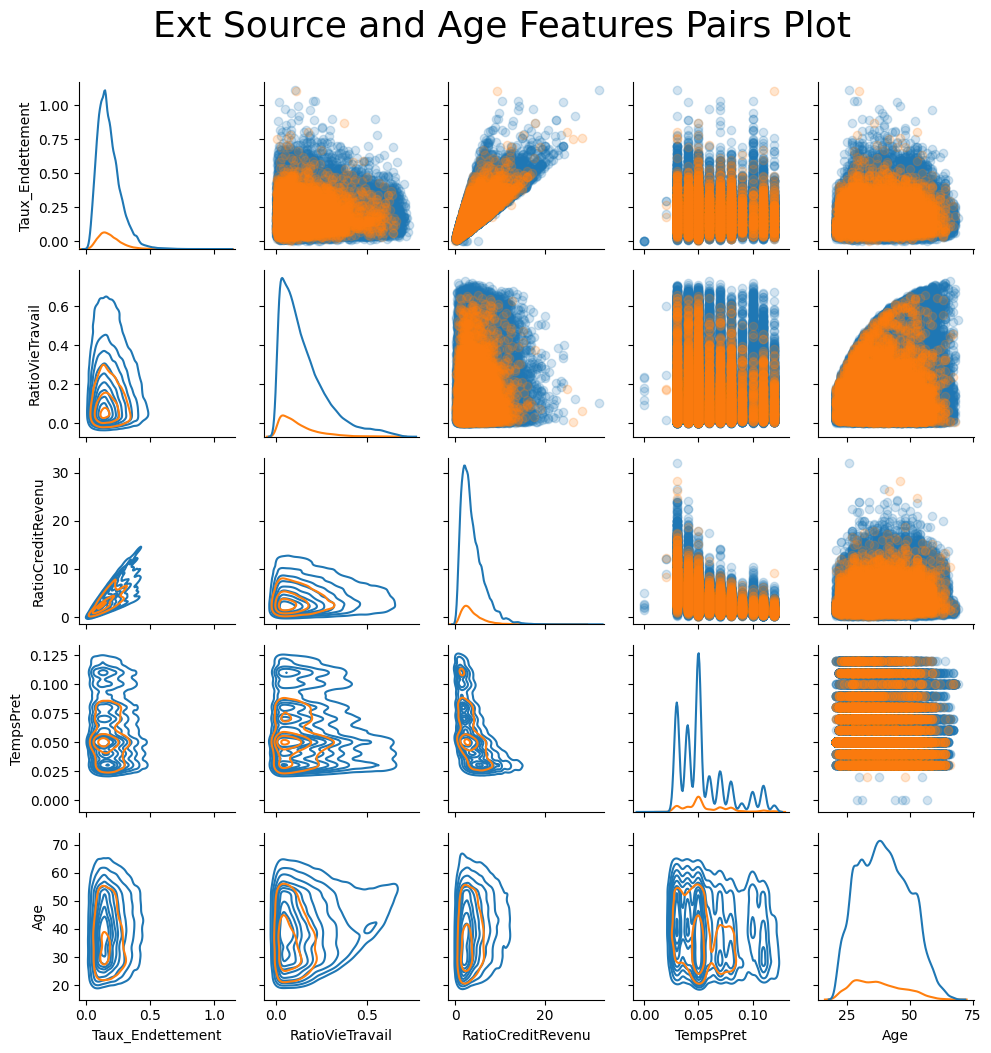

In [27]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['Age'] = data['Age']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 2, diag_sharey=False,
                    hue = 'TARGET',
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 26, y = 1.05);

## Encodage pour ML

## GRoupe 2 : 'TARGET', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'DAYS_BIRTH'

In [28]:
ext_data2 = data[['TARGET','NAME_FAMILY_STATUS','CNT_CHILDREN','NAME_HOUSING_TYPE', 'DAYS_BIRTH']]
ext_data_corrs2 = ext_data2.corr()
ext_data_corrs2

,TARGET,NAME_FAMILY_STATUS,CNT_CHILDREN,NAME_HOUSING_TYPE,DAYS_BIRTH
TARGET,1.000000,0.028177,0.008005,0.030297,0.065899
NAME_FAMILY_STATUS,0.028177,1.000000,-0.194158,0.135187,0.112051
CNT_CHILDREN,0.008005,-0.194158,1.000000,-0.002127,0.239819
NAME_HOUSING_TYPE,0.030297,0.135187,-0.002127,1.000000,0.225204
DAYS_BIRTH,0.065899,0.112051,0.239819,0.225204,1.000000


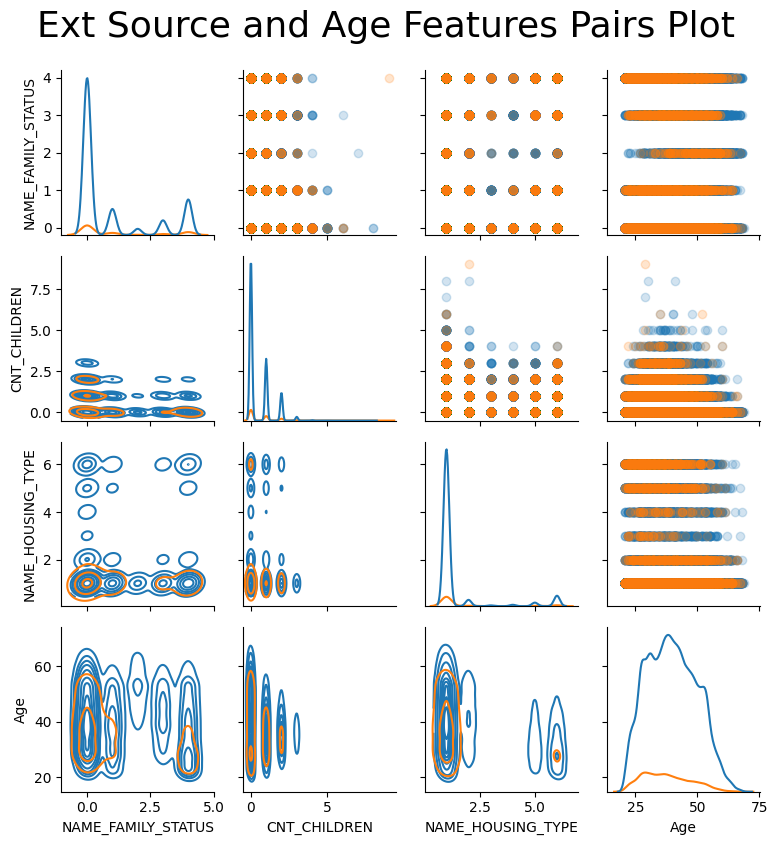

In [29]:
# Copy the data for plotting
plot_data = ext_data2.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['Age'] = data['Age']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 2, diag_sharey=False,
                    hue = 'TARGET',
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 26, y = 1.05);

In [30]:
train_labels = data['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
data, data_test = data.align(data_test, join = 'inner', axis = 1)

# Add the target back in
data['TARGET'] = train_labels

print('Training Features shape: ', data.shape)
print('Testing Features shape: ', data_test.shape)

Training Features shape:  (211120, 136)
Testing Features shape:  (33139, 135)


In [31]:
# one-hot encoding of categorical variables
data = pd.get_dummies(data)
data_test = pd.get_dummies(data_test)

print('Training Features shape: ', data.shape)
print('Testing Features shape: ', data_test.shape)

Training Features shape:  (211120, 246)
Testing Features shape:  (33139, 249)


In [32]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            data_test[col] = le.transform(data_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


## Groupe 3 : 'TARGET', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','MauvaisPayeur', 'DAYS_BIRTH'

In [33]:
ext_data3 = merged_data[['TARGET', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','MauvaisPayeur', 'DAYS_BIRTH']]
ext_data_corrs3 = ext_data3.corr()
ext_data_corrs3

,TARGET,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,MauvaisPayeur,DAYS_BIRTH
TARGET,1.000000,0.035059,0.033087,-0.012677,0.065899
DEF_30_CNT_SOCIAL_CIRCLE,0.035059,1.000000,0.864421,-0.003203,0.016977
DEF_60_CNT_SOCIAL_CIRCLE,0.033087,0.864421,1.000000,-0.001847,0.017647
MauvaisPayeur,-0.012677,-0.003203,-0.001847,1.000000,-0.008668
DAYS_BIRTH,0.065899,0.016977,0.017647,-0.008668,1.000000


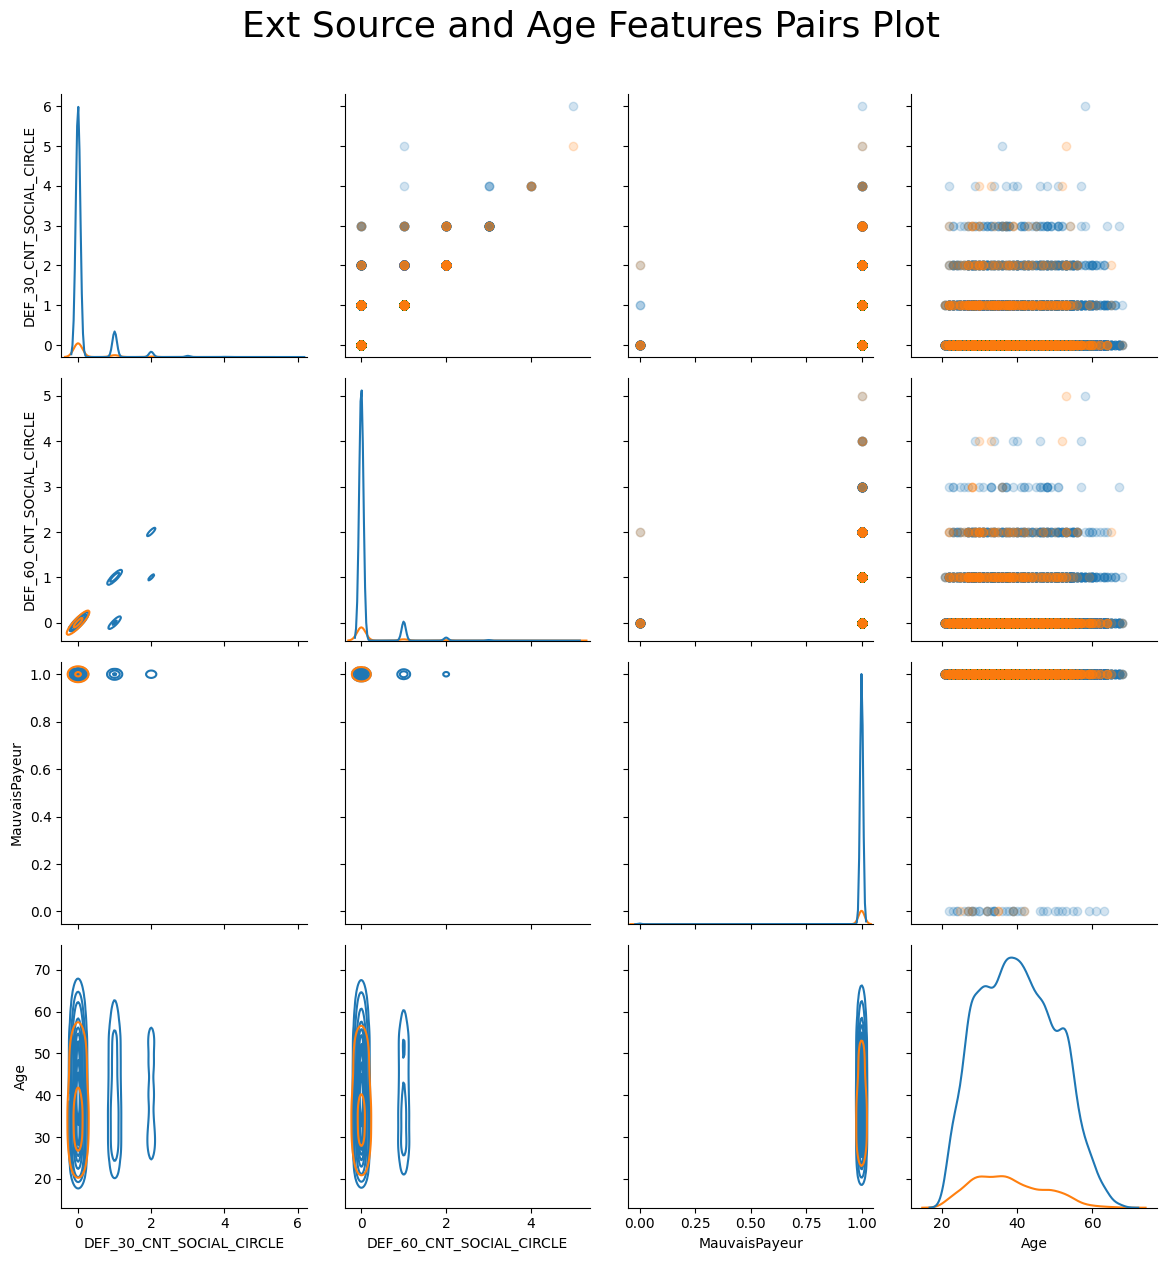

In [34]:
# Copy the data for plotting
plot_data = ext_data3.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['Age'] = merged_data['Age']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
                    hue = 'TARGET',
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 26, y = 1.05);

# Sauvegarde Nouveu CSV

In [35]:
# Sauvegarder le DataFrame 'data' prétraité pour l'utilisation de ML
data.to_csv('/content/drive/MyDrive/Parcours_OCR_AI_Engineer/Projets/P004_/En_Cours/application_train_PourML.csv', index=False)
bureau.to_csv('/content/drive/MyDrive/Parcours_OCR_AI_Engineer/Projets/P004_/En_Cours/bureau_PourML.csv', index=False)
data_test.to_csv('/content/drive/MyDrive/Parcours_OCR_AI_Engineer/Projets/P004_/En_Cours/application_test_PourML.csv', index=False)
